In [1]:
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from tools import get_energies, get_cartesian_coordinates, downsample_data

Consider the 2-dimensional polar coordinates, defined as:
<p align="center">
  <img src="pictures/polar_cartesian.png" alt="Cartesian-Polar coordinates" title="Cartesian-Polar coordinates">
</p>

and the most general definition of the position vector:
\begin{equation}
\vec{r}=r\hat{r}
\end{equation}
Considering the fact that both the length and the direction might in the general case posses a time-dependence, taking the derivative involves utilizing the product-rule, s.t.:
\begin{equation}
\vec{v}\equiv\dot{\vec{r}}=\frac{d\vec{r}}{dt}=\frac{dr}{dt}\hat{r}+r\frac{d\hat{r}}{dt}
\end{equation}
and from simple trigonometry it is given:
\begin{equation}
\hat{r}=\hat{x}\cos(\phi)+\hat{y}\sin(\phi), \quad\hat{\phi}=-\hat{x}\sin(\phi)+\hat{y}\cos(\phi)
\end{equation}
s.t. (w. constant $\hat{x},\hat{y}$):
\begin{equation}
\frac{d\hat{r}}{dt}=\hat{x}\frac{d\cos(\phi)}{dt}+\hat{y}\frac{d\sin(\phi)}{dt}=\hat{x}\big(-\sin(\phi)\big)\dot{\phi}+\hat{y}\cos(\phi)\dot{\phi} = \dot{\phi}\hat{\phi}
\end{equation}

such that the velocity becomes:
\begin{equation}
\vec{v}\equiv \dot{\vec{r}}=\dot{r}\hat{r}+r\dot{\phi}\hat{\phi}
\end{equation}

Let us then consider the simple double pendulum:
<p align="center">
  <img src="pictures/double_pendulum.png" alt="Double pendulum" title="Double pendulum">
</p>

and let us initially define the lagrangian:
\begin{equation}
\mathcal{L}=T-U
\end{equation}

and then recall the general definitions of the potential and kinetic energy:

\begin{equation}
T=\frac{1}{2}mv^2,\quad U=mgh
\end{equation}

where $h$ is the vertical displacement relative to the gravitational reference level.

From inspection of the above figure one can find the 2 contributions to the potential energy:
\begin{equation}
U_1 = m_1gl_1\big(1-cos(\phi_1)\big),\quad U_2 = m_2g\Big[l_1\big(1-cos(\phi_1)\big)+l_2\big(1-cos(\phi_2)\big)\Big]
\end{equation}

and the kinetic energy:
\begin{equation}
T_1=\frac{1}{2}m_1v_1^2,\quad T_2=\frac{1}{2}m_2v_2^2
\end{equation}

where the speed is generally defined as the $l_2$-norm of the velocity, such that:
\begin{equation}
v_1^2=||\vec{v}_1||^2_2=||\dot{l_1}\hat{l_1}+l_1\dot{\phi_1}\hat{\phi_1}||_2^2=||l_1\dot{\phi_1}\hat{\phi_1}||^2_2=l_1^2\dot{\phi_1}^2||\hat{\phi_1}||_2^2=l_1^2\dot{\phi_1}^2\langle \hat{\phi_1}|\hat{\phi_1}\rangle=l_1^2\dot{\phi_1}^2
\end{equation}

and the velocity of the second becomes the vector sum (both the motion of upper pendulum relative to ceiling and lower pendulum relative to upper contributes to lower pendulums velocity):

\begin{equation}
v_2^2=||\vec{v}_1+\vec{v}_{1\to2}||^2_2=||l_1\dot{\phi_1}\hat{\phi_1}+l_2\dot{\phi_2}\hat{\phi_2}||_2^2=l_1^2\dot{\phi_1}^2\langle \hat{\phi_1}|\hat{\phi_1}\rangle+l_2^2\dot{\phi_2}^2\langle \hat{\phi_2}|\hat{\phi_2}\rangle+2l_1l_2\dot{\phi_1}\dot{\phi_2}\langle \hat{\phi_1}|\hat{\phi_2}\rangle=l_1^2\dot{\phi_1}^2+l_2^2\dot{\phi_2}^2+2l_1l_2\dot{\phi_1}\dot{\phi_2}\cos(\phi_1-\phi_2)
\end{equation}

and as such, the lagrangian becomes: 
\begin{equation}
\mathcal{L}=T-U=\frac{1}{2}\Big[m_1l_1^2\dot{\phi_1}^2+m_2\big(l_1^2\dot{\phi_1}^2+l_2^2\dot{\phi_2}^2+2l_1l_2\dot{\phi_1}\dot{\phi_2}\cos(\phi_1-\phi_2)\big)\Big]-g\bigg[m_1l_1\big(1-cos(\phi_1)\big)+m_2\Big[l_1\big(1-cos(\phi_1)\big)+l_2\big(1-cos(\phi_2)\big)\Big]\bigg]
\end{equation}

The next step now is to define the Euler-Lagrange equations for the coordinates of the system: 
\begin{equation}
\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{\phi}_i}\right) - \frac{\partial \mathcal{L}}{\partial \phi_i} = 0
\end{equation}

but all the differentiation is tedious and we therefore utilize sympy:

In [2]:
# Define the symbols
t = sp.symbols('t')  # time
m1, m2, l1, l2, g = sp.symbols('m1 m2 l1 l2 g')        # masses, lengths, gravitational acceleration
phi1, phi2 = sp.symbols('phi1 phi2', cls=sp.Function)  # angles as functions of time

# Define the angle functions and their derivatives
phi1, phi2 = phi1(t), phi2(t)
phi1_dot, phi2_dot = sp.diff(phi1, t), sp.diff(phi2, t)

# Define the Lagrangian
U1 = m1 * g * l1 * (1 - sp.cos(phi1))
U2 = m2 * g * (l1 * (1 - sp.cos(phi1)) + l2 * (1 - sp.cos(phi2)))
U = U1 + U2

T1 = sp.Rational(1, 2) * m1 * (l1 * phi1_dot)**2
T2 = sp.Rational(1, 2) * m2 * (l1**2 * phi1_dot**2 + l2**2 * phi2_dot**2 + 2 * l1 * l2 * phi1_dot * phi2_dot * sp.cos(phi1 - phi2))
T = T1+T2
L = T-U

In [3]:
# Apply the Euler-Lagrange equation
EL1 = sp.diff(sp.diff(L, phi1_dot), t) - sp.diff(L, phi1)
EL2 = sp.diff(sp.diff(L, phi2_dot), t) - sp.diff(L, phi2)

# Optionally, simplify the equations
EL1_simplified = sp.Eq(sp.simplify(EL1),0)
EL2_simplified = sp.Eq(sp.simplify(EL2),0)

# Convert the equations to LaTeX format a
EL1_latex = sp.latex(EL1_simplified)
EL2_latex = sp.latex(EL2_simplified)

# Write to a .txt file
with open('euler_lagrange_equations.txt', 'w') as file:
    file.write('Euler-Lagrange Equation for phi1:\n')
    file.write(EL1_latex + '\n\n')
    file.write('Euler-Lagrange Equation for phi2:\n')
    file.write(EL2_latex + '\n\n')

CTRL-C -> CTRL-V the two equations from the .txt file:

\begin{align}
l_{1} \left(g m_{1} \sin{\left(\phi_{1}{\left(t \right)} \right)} + g m_{2} \sin{\left(\phi_{1}{\left(t \right)} \right)} + l_{1} m_{1} \frac{d^{2}}{d t^{2}} \phi_{1}{\left(t \right)} + l_{1} m_{2} \frac{d^{2}}{d t^{2}} \phi_{1}{\left(t \right)} + l_{2} m_{2} \sin{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{2}{\left(t \right)}\right)^{2} + l_{2} m_{2} \cos{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi_{2}{\left(t \right)}\right)&=0 \\

l_{2} m_{2} \left(g \sin{\left(\phi_{2}{\left(t \right)} \right)} - l_{1} \sin{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{1}{\left(t \right)}\right)^{2} + l_{1} \cos{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi_{1}{\left(t \right)} + l_{2} \frac{d^{2}}{d t^{2}} \phi_{2}{\left(t \right)}\right)&=0
\end{align}

now to solve these numerically, we have to transform the into 1-order coupled diffs, which we first do by solving the above system of equations for $\frac{d^{2}}{d t^{2}} \phi_{1}$ and $\frac{d^{2}}{d t^{2}} \phi_{2}$, which, to save time is again done by sympy: 

In [4]:
# Defining the second order time deriv variables
phi1_ddot, phi2_ddot = sp.diff(phi1, t, t), sp.diff(phi2, t, t)
# Solving the system of EL equations for the second order time derivatives
# N.B. Solutions is a dict: variable -> equation
solutions = sp.solve([EL1_simplified, EL2_simplified], (phi1_ddot, phi2_ddot)) 

# Convert the equations to LaTeX format 
phi1_ddot_latex = sp.latex(phi1_ddot)+'='+sp.latex(sp.simplify(solutions[phi1_ddot]))
phi2_ddot_latex = sp.latex(phi2_ddot)+'='+sp.latex(sp.simplify(solutions[phi2_ddot]))

# Write to a .txt file
with open('second_order_equations.txt', 'w') as file:
    file.write('Second Order Equation for phi1:\n')
    file.write(phi1_ddot_latex + '\n\n')
    file.write('Second Order Equation for phi2:\n')
    file.write(phi2_ddot_latex + '\n\n')

CTRL-C -> CTRL-V the two equations from the .txt file:

\begin{align}
\frac{d^{2}}{d t^{2}} \phi_{1}{\left(t \right)}&=\frac{- g m_{1} \sin{\left(\phi_{1}{\left(t \right)} \right)} - \frac{g m_{2} \sin{\left(\phi_{1}{\left(t \right)} - 2 \phi_{2}{\left(t \right)} \right)}}{2} - \frac{g m_{2} \sin{\left(\phi_{1}{\left(t \right)} \right)}}{2} - \frac{l_{1} m_{2} \sin{\left(2 \phi_{1}{\left(t \right)} - 2 \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{1}{\left(t \right)}\right)^{2}}{2} - l_{2} m_{2} \sin{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{2}{\left(t \right)}\right)^{2}}{l_{1} \left(m_{1} - m_{2} \cos^{2}{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} + m_{2}\right)}

 \\

\frac{d^{2}}{d t^{2}} \phi_{2}{\left(t \right)}&=\frac{\frac{g m_{1} \sin{\left(2 \phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)}}{2} - \frac{g m_{1} \sin{\left(\phi_{2}{\left(t \right)} \right)}}{2} + \frac{g m_{2} \sin{\left(2 \phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)}}{2} - \frac{g m_{2} \sin{\left(\phi_{2}{\left(t \right)} \right)}}{2} + l_{1} m_{1} \sin{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{1}{\left(t \right)}\right)^{2} + l_{1} m_{2} \sin{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{1}{\left(t \right)}\right)^{2} + \frac{l_{2} m_{2} \sin{\left(2 \phi_{1}{\left(t \right)} - 2 \phi_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} \phi_{2}{\left(t \right)}\right)^{2}}{2}}{l_{2} \left(m_{1} - m_{2} \cos^{2}{\left(\phi_{1}{\left(t \right)} - \phi_{2}{\left(t \right)} \right)} + m_{2}\right)}

\end{align}

and now, by simply introducing auxiliary variables we get the following 4 coupled 1-order diffs: 

\begin{align}
\frac{d}{dt} \phi_1(t) &= \omega_1 \\
\frac{d}{dt} \omega_1 &= \frac{- g m_{1} \sin(\phi_{1}(t)) - \frac{g m_{2} \sin(\phi_{1}(t) - 2 \phi_{2}(t))}{2} - \frac{g m_{2} \sin(\phi_{1}(t))}{2} - \frac{l_{1} m_{2} \sin(2 \phi_{1}(t) - 2 \phi_{2}(t)) \omega_1^2}{2} - l_{2} m_{2} \sin(\phi_{1}(t) - \phi_{2}(t)) \omega_2^2}{l_{1} (m_{1} - m_{2} \cos^2(\phi_{1}(t) - \phi_{2}(t)) + m_{2})} \\
\frac{d}{dt} \phi_2(t) &= \omega_2 \\
\frac{d}{dt} \omega_2 &= \frac{\frac{g m_{1} \sin(2 \phi_{1}(t) - \phi_{2}(t))}{2} - \frac{g m_{1} \sin(\phi_{2}(t))}{2} + \frac{g m_{2} \sin(2 \phi_{1}(t) - \phi_{2}(t))}{2} - \frac{g m_{2} \sin(\phi_{2}(t))}{2} + l_{1} m_{1} \sin(\phi_{1}(t) - \phi_{2}(t)) \omega_1^2 + l_{1} m_{2} \sin(\phi_{1}(t) - \phi_{2}(t)) \omega_1^2 + \frac{l_{2} m_{2} \sin(2 \phi_{1}(t) - 2 \phi_{2}(t)) \omega_2^2}{2}}{l_{2} (m_{1} - m_{2} \cos^2(\phi_{1}(t) - \phi_{2}(t)) + m_{2})}
\end{align}

In [5]:
# Turning the second order equations into vectorized numpy functions that can efficiently evaluate numerical values
phi1_ddot_lambdified = sp.lambdify([m1, m2, l1, l2, g, phi1, phi2, phi1_dot, phi2_dot], solutions[phi1_ddot], 'numpy')
phi2_ddot_lambdified = sp.lambdify([m1, m2, l1, l2, g, phi1, phi2, phi1_dot, phi2_dot], solutions[phi2_ddot], 'numpy')

# Wrapping in outer function to make more recognizable 
def d2_phi_1_dt2(phi_1:float, d_phi_1_dt: float, 
                 phi_2:float, d_phi_2_dt: float,
                 length_1: float, length_2: float, 
                 mass_1: float, mass_2: float, 
                 g: float):
    return phi1_ddot_lambdified(mass_1, mass_2, length_1, length_2, g, phi_1, phi_2, d_phi_1_dt, d_phi_2_dt)

def d2_phi_2_dt2(phi_1:float, d_phi_1_dt: float, 
                 phi_2:float, d_phi_2_dt: float,
                 length_1: float, length_2: float, 
                 mass_1: float, mass_2: float, 
                 g: float):
    return phi2_ddot_lambdified(mass_1, mass_2, length_1, length_2, g, phi_1, phi_2, d_phi_1_dt, d_phi_2_dt)

In [17]:
# Define the ODE function
def double_pendulum(t, y, l1, l2, m1, m2, g):
    phi_1, d_phi_1_dt, phi_2, d_phi_2_dt = y
    d2_phi_1_dt2_value = d2_phi_1_dt2(phi_1=phi_1, d_phi_1_dt=d_phi_1_dt, phi_2=phi_2, d_phi_2_dt=d_phi_2_dt,
                                      length_1=l1, length_2=l2, mass_1=m1, mass_2=m2, g=g)
    d2_phi_2_dt2_value = d2_phi_2_dt2(phi_1=phi_1, d_phi_1_dt=d_phi_1_dt, phi_2=phi_2, d_phi_2_dt=d_phi_2_dt,
                                      length_1=l1, length_2=l2, mass_1=m1, mass_2=m2, g=g)
    return [d_phi_1_dt, d2_phi_1_dt2_value, d_phi_2_dt, d2_phi_2_dt2_value]

# Initial conditions: [phi_1_init, d_phi_1_dt_init, phi_2_init, d_phi_2_dt_init]
phi_1_init, phi_2_init = np.pi/4, np.pi
phi_1_dot_init, phi_2_dot_init = 0, 0
initial_conditions = [phi_1_init, phi_1_dot_init,
                      phi_2_init, phi_2_dot_init]  

# Parameters
l1, l2 = 1, 1.5
m1, m2 = 1, 1.5
g = 9.82
params = (l1, l2, m1, m2, g)  

# Time span for the simulation
t_min, t_max = 0, 15
n_times = int(t_max*200)

time_span = np.linspace(start=t_min, stop=t_max, num=n_times)

# Solve the ODEs
solution = sc.integrate.solve_ivp(fun=double_pendulum,
                        t_span=(t_min,t_max),
                        y0=initial_conditions,
                        method='Radau',
                        args=params,
                        t_eval=time_span)

print(solution.message)

The solver successfully reached the end of the integration interval.


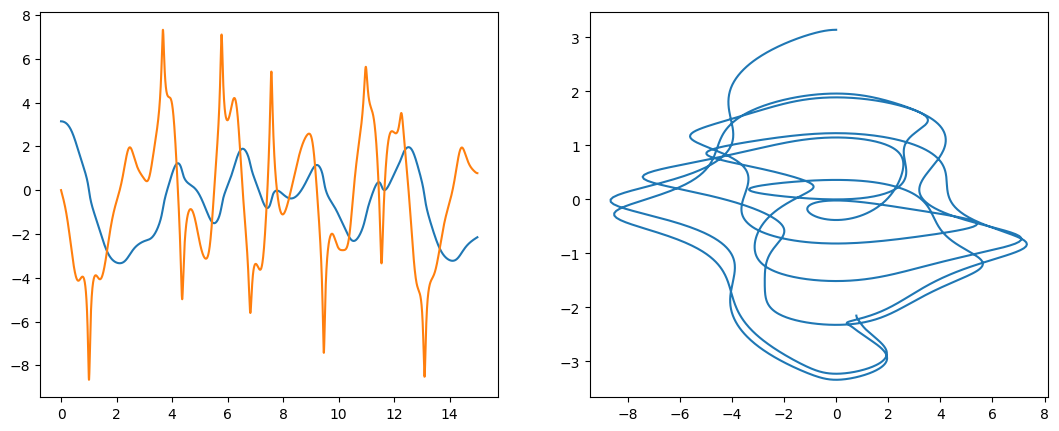

In [18]:
_, __, lower_pendulum_angles, lower_pendulum_angle_velocities = solution.y

fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].plot(solution.t, lower_pendulum_angles)
ax[0].plot(solution.t, lower_pendulum_angle_velocities)
ax[1].plot(lower_pendulum_angle_velocities, lower_pendulum_angles)

In [19]:
kinetic_energies, potential_energies = get_energies(solver_result=solution,
                                                    mass_upper=m1, 
                                                    mass_lower=m2,
                                                    length_upper=l1,
                                                    length_lower=l2,
                                                    gravity=g)
_upper_pendulum_, _lower_pendulum_, _times_ = get_cartesian_coordinates(solver_result=solution,
                                                                  length_upper=l1,
                                                                  length_lower=l2)

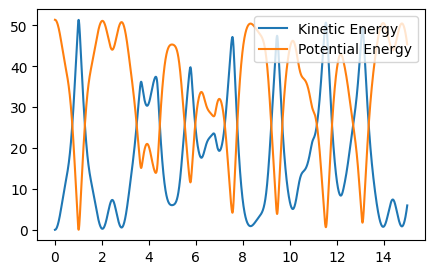

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(_times_, kinetic_energies, label='Kinetic Energy')
ax.plot(_times_, potential_energies, label='Potential Energy')
ax.legend(loc=1)
plt.show()


In [21]:
"""upper_pendulum, lower_pendulum, times = downsample_data(upper_pendulum=_upper_pendulum_,
                                                        lower_pendulum=_lower_pendulum_,
                                                        times=_times_,
                                                        n=n_times//1000)"""

upper_pendulum, lower_pendulum, times = _upper_pendulum_, _lower_pendulum_, _times_

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


resolution = 300
fig, ax = plt.subplots(figsize=(5, 5), dpi=resolution)

# Initial plot elements
line1, = ax.plot([], [], lw=2)  # Line for the upper arm
line2, = ax.plot([], [], lw=2)  # Line for the lower arm
point1, = ax.plot([], [], 'ro', ms=5)  # Point for the upper pendulum
point2, = ax.plot([], [], 'ro', ms=5)  # Point for the lower pendulum

# Store the trace data as lists of line segments
trace_segments_upper = []
trace_segments_lower = []

# Parameters for the trace
trace_length = 500  # Adjust as needed
fade_factor = 0.992  # Adjust for different fading speeds
fade_trace = True  # Set to False to disable fading

# Initialization function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    point1.set_data([], [])
    point2.set_data([], [])
    return line1, line2, point1, point2

# Animation update function
def update(idx):
    # Upper arm
    line1.set_data([0, upper_pendulum[idx, 0]], [0, upper_pendulum[idx, 1]])
    point1.set_data(upper_pendulum[idx, 0], upper_pendulum[idx, 1])

    # Lower arm
    line2.set_data([upper_pendulum[idx, 0], lower_pendulum[idx, 0]], [upper_pendulum[idx, 1], lower_pendulum[idx, 1]])
    point2.set_data(lower_pendulum[idx, 0], lower_pendulum[idx, 1])

    # Update trace for upper pendulum
    if idx > 0:
        new_segment_upper, = ax.plot([upper_pendulum[idx-1, 0], upper_pendulum[idx, 0]],
                                     [upper_pendulum[idx-1, 1], upper_pendulum[idx, 1]], 
                                     color='blue', lw=1, alpha=1)
        trace_segments_upper.append(new_segment_upper)

        # Update trace for lower pendulum
        new_segment_lower, = ax.plot([lower_pendulum[idx-1, 0], lower_pendulum[idx, 0]],
                                     [lower_pendulum[idx-1, 1], lower_pendulum[idx, 1]], 
                                     color='green', lw=1, alpha=1)
        trace_segments_lower.append(new_segment_lower)

        # Fade older segments if fade_trace is True
        if fade_trace:
            for segment in trace_segments_upper[:-1]:  # Exclude the newest segment
                alpha = segment.get_alpha() * fade_factor
                segment.set_alpha(alpha)

            for segment in trace_segments_lower[:-1]:  # Exclude the newest segment
                alpha = segment.get_alpha() * fade_factor
                segment.set_alpha(alpha)

        # Remove the oldest segment if trace is too long
        if len(trace_segments_upper) > trace_length:
            old_segment_upper = trace_segments_upper.pop(0)
            old_segment_upper.remove()

        if len(trace_segments_lower) > trace_length:
            old_segment_lower = trace_segments_lower.pop(0)
            old_segment_lower.remove()

    return [line1, line2, point1, point2] + trace_segments_upper + trace_segments_lower

# Setting additional things
ax.set_xlim(-1.2*(l1+l2), 1.2*(l1+l2))
ax.set_ylim(-1.2*(l1+l2), 1.2*(l1+l2))
ax.set_aspect('equal')
ax.hlines(0, -1.2*(l1+l2), 1.2*(l1+l2), lw=3, color='k')

# Remove axis ticks and labels
ax.set_xticks([]), ax.set_yticks([])
ax.set_xlabel(''), ax.set_ylabel('')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(times), init_func=init, blit=True, interval=1)

# Set up the writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=200, metadata=dict(artist='Sebastian Yde'))

# Save the animation
ani.save('double_pendulum_animation.mp4', writer=writer)

plt.close(fig)